## Nonlinear Features

October 3, 2019

Duncan Callaway

This notebook explores how adding nonlinear transformation of predictors improves (or doesn't) model fit.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
#this will allow us to see all the columns of the data frame when we display it.
pd.set_option('display.max_columns', 150)

In [3]:
# we'll use these later in the notebook
novotny_features = ['WRF+DOMINO', 'Impervious_6000', 'Major_800', 'total_100', 'Major_100', 'Major_200', 'Elevation_truncated_km', 'Distance_to_coast_km', 'Population_800', 'total_800'];

In [4]:
df_all = pd.read_csv('BechleLUR_2006_allmodelbuildingdata.csv')

In [5]:
df_all.head()

,Monitor_ID,State,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,Impervious_200,Impervious_300,Impervious_400,Impervious_500,Impervious_600,Impervious_700,Impervious_800,Impervious_1000,Impervious_1200,Impervious_1500,Impervious_1800,Impervious_2000,Impervious_2500,Impervious_3000,Impervious_3500,Impervious_4000,Impervious_5000,Impervious_6000,Impervious_7000,Impervious_8000,Impervious_10000,Population_100,Population_200,Population_300,Population_400,Population_500,Population_600,Population_700,Population_800,Population_1000,Population_1200,Population_1500,Population_1800,Population_2000,Population_2500,Population_3000,Population_3500,Population_4000,Population_5000,Population_6000,Population_7000,Population_8000,Population_10000,Major_100,Major_200,Major_300,Major_400,Major_500,Major_600,Major_700,Major_800,Major_1000,Major_1200,Major_1500,Major_1800,Major_2000,Major_2500,Major_3000,Major_3500,Major_4000,Major_5000,Major_6000,Major_7000,Major_8000,Major_10000,Resident_100,Resident_200,Resident_300,Resident_400,Resident_500,Resident_600,Resident_700,Resident_800,Resident_1000,Resident_1200,Resident_1500,Resident_1800,Resident_2000,Resident_2500,Resident_3000,Resident_3500,Resident_4000,Resident_5000,Resident_6000,Resident_7000,Resident_8000,Resident_10000,Resident_10500,Resident_11000,Resident_11500,Resident_12000,Resident_12500,Resident_13000,Resident_13500,Resident_14000,total_100,total_200,total_300,total_400,total_500,total_600,total_700,total_800,total_1000,total_1200,total_1500,total_1800,total_2000,total_2500,total_3000,total_3500,total_4000,total_5000,total_6000,total_7000,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
0,04-013-0019-42602-1,AZ,33.48385,-112.14257,23.884706,20.986643,11.615223,313.0,0.304,59.4431,59.4715,59.4810,59.4572,59.3039,59.1636,59.0507,58.9488,58.7941,58.9821,59.2879,59.8456,60.1169,60.1553,59.7722,59.5908,59.5556,59.2200,58.3484,57.5475,56.3765,52.2642,3434.0000,3434.0000,3411.8328,3369.4805,3374.2180,3403.9201,3425.0499,3440.4236,3467.5636,3496.6767,3507.2187,3388.9482,3306.8511,3096.9563,2870.9081,2712.0688,2652.9409,2541.2515,2428.1611,2337.5601,2245.5723,2024.5460,0.00000,0.00000,0.00000,0.00000,0.49224,0.84872,1.11154,1.35858,3.48036,6.72288,10.45728,17.17240,21.46712,31.77685,50.76791,79.74268,104.89995,166.58362,231.04656,298.41773,384.37428,554.79507,0.61637,1.76406,3.64989,6.05967,9.08376,12.49667,16.72079,20.95306,28.19335,36.77423,56.07123,76.17936,92.75979,141.40171,208.14918,277.49442,360.92204,560.02672,803.90089,1089.93658,1404.00587,2083.12410,2269.08304,2454.55438,2635.14164,2843.33267,3069.31560,3254.15743,3433.87888,3623.34585,0.61637,1.76406,3.64989,6.05967,9.57600,13.34539,17.83233,22.31164,31.67371,43.49711,66.52851,93.35176,114.22691,173.17856,258.91709,357.23710,465.82199,726.61034,1034.94745,1388.35431,1788.38015,2637.91917,2862.73591,3096.99468,3339.22952,3609.20650,3896.25748,4150.54739,4396.96011,4651.18890
1,04-013-3002-42602-6,AZ,33.45793,-112.04601,25.089886,20.990096,11.472677,323.8,0.304,72.0000,72.0000,72.0000,72.0000,71.9109,71.6594,71.4787,71.4093,71.4899,71.6481,71.9319,71.8449,71.2728,69.4570,68.0373,66.6440,65.7764,63.4799,60.5909,59.0333,58.2535,55.1395,2715.9121,2820.9973,2857.7844,2882.9007,2922.6060,2955.1033,2980.2975,2975.5773,2858.6769,2713.3988,2540.6768,2411.3403,2336.4432,2171.0319,2067.0406,1998.7573,1939.4790,1826.4574,1728.7592,1683.7545,1683.8406,1652.0872,0.00000,0.16726,0.47770,0.70926,0.92816,3.44480,5.58398,7.46132,13.62402,26.06820,40.44928,51.82634,60.07474,79.14227,100.46330,130.76356,159.86952,232.42547,291.65556,383.84647,499.06352,705.01818,0.26126,1.14480,1.98903,4.33272,6.93099,9.68176,13.13134,17.11873,25.53028,36.59210,56.75135,83.25340,99.69127,149.45363,207.70180,272.08012,351.49761,549.40811,725.27587,947.93127,1231.98435,1857.31130,2029.32556,2196.75975,2384.41496,2579.46411,277

In [6]:
X = df_all.loc[:,'WRF+DOMINO']
Y = df_all.loc[:,'Observed_NO2_ppb']

In [7]:
X.head()

0    11.615223
1    11.472677
2     8.990372
3    11.919268
4     2.141366
Name: WRF+DOMINO, dtype: float64

Text(0,0.5,'observed')

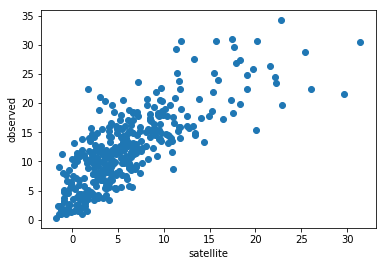

In [9]:
plt.scatter(X,Y)
plt.xlabel('satellite')
plt.ylabel('observed')

In [10]:
X_const = sm.add_constant(X)
X_const.head()

,const,WRF+DOMINO
0,1.0,11.615223
1,1.0,11.472677
2,1.0,8.990372
3,1.0,11.919268
4,1.0,2.141366


In [12]:
est = sm.OLS(Y, X_const)
result_simple = est.fit()
result_simple.aic

2079.9621899902477

## Now work with full data set

In [13]:
X_full = df_all.loc[:,'WRF+DOMINO':'total_14000']
X_full_const = sm.add_constant(X_full)
est_full = sm.OLS(Y, X_full_const)
result_simple_full = est_full.fit()
result_simple_full.aic

1943.8860203123427

In [21]:
X_nov = df_all.loc[:,novotny_features]
X_nov_const = sm.add_constant(X_nov)
est_nov = sm.OLS(Y, X_nov_const)
result_simple_nov = est_nov.fit()
result_simple_nov.aic

1894.6813213241203

## Nonlinear predictor

In [27]:
to_add = df_all['Population_800']**(0.25)

In [28]:
to_add.head()

0    7.658663
1    7.385719
2    6.596641
3    7.145223
4    2.683165
Name: Population_800, dtype: float64

In [29]:
X_new = X_nov
X_new['Pop_100sq'] = to_add

In [30]:
X_new_const = sm.add_constant(X_new)
est_new = sm.OLS(Y, X_new_const)
result_simple_new = est_new.fit()
result_simple_new.aic

1872.9185518714821